## Information extracted from paper - How Powerful are Graph Neural Networks? ICLR 2019
Bioinformatics datasets: MUTAG, PTC, NCI1,PROTEINS  
Social network datasets: COLLAB, IMDB-BINARY, IMDB-MULTI, REDDITBINARY, REDDIT-MULTI5K  

For all configurations, 5 GNN layers are applied.  
All MLPs have 2 layers.  
Initial learning rate 0.01.  
Decay learning rate 0.5 every 50 epochs.  
IMDB and COLLAB datasets require --degree_as_tag


Hyperparams tuned:
1. No. hidden units {16,32} for bioinformatics graphs / 64 for social graphs
2. Batch size {32,128}
3. Dropout ratio {0,0.5}
4. Number of epochs

##### *Edited the main.py code in writing to text file  

    results = []  
    for epoch in range(1, args.epochs + 1):  
        ...  
        results.append([avg_loss, acc_train, acc_test])  

    if not args.filename == "":
                with open(args.filename, 'w') as f:
                    for epoch in results:
                        f.write(str(epoch)[1:-1])
                        f.write("\n")

### Objective: To reproduce results from https://github.com/weihua916/powerful-gnns

In [23]:
import os
import subprocess

DATASET_PARAM = '--dataset'
BATCHSIZE_PARAM = '--batch_size'
EPOCHS_PARAM = '--epochs'
LR_PARAM = '--lr'
SEED_PARAM = '--seed'
NUMLAYERS_PARAM = '--num_layers'
NUMMLPLAYERS_PARAM = '--num_mlp_layers'
HIDDENDIM_PARAM = '--hidden_dim'
FINALDROPOUT_PARAM = '--final_dropout'
GRAPHPOOLING_PARAM = '--graph_pooling_type'
NEIGHBORPOOLING_PARAM = '--neighbor_pooling_type'
LEARNEPS_PARAM = '--learn_eps'
DEGREEASTAG_PARAM = '--degree_as_tag'
FILENAME_PARAM = '--filename'


#result = subprocess.run(['python', 'main.py', '--epochs', '10', '--filename', 'test.txt'], stdout=subprocess.PIPE)
#print(result.stdout.decode('utf-8'))


### IMDB Binary

In [ ]:
#fixed
epochs = 350

#dataset dependent
dataset = 'IMDBBINARY'
hiddendim = 64
#degtag

#different models aggregator/perceptron
neighborpoolings = ('sum','average','max')
nummlplayers = (1,2)

#tuning
batchsizes = (32,128)
dropoutratios = (0,0.5)

filenames = []

#Models
for neighborpooling in neighborpoolings:
    for nummlplayer in nummlplayers:
        for batchsize in batchsizes:
            for dropoutratio in dropoutratios:
                filename = '_'.join([dataset, str(neighborpooling),'mlp'+str(nummlplayer), 'batch'+str(batchsize), 'dropout'+str(dropoutratio),  'degtag'])
                filename = filename + '.txt'
                print(filename)
                filenames.append(filename)
                subprocess.run(['python', 'main.py', 
                                EPOCHS_PARAM, str(epochs), 
                                DATASET_PARAM, str(dataset),
                                HIDDENDIM_PARAM, str(hiddendim),
                                NEIGHBORPOOLING_PARAM, str(neighborpooling),
                                NUMMLPLAYERS_PARAM, str(nummlplayer),
                                BATCHSIZE_PARAM, str(batchsize),
                                FINALDROPOUT_PARAM, str(dropoutratio),
                                DEGREEASTAG_PARAM, 
                                FILENAME_PARAM, str(filename)], stdout=subprocess.PIPE)

#GIN-EPS
for batchsize in batchsizes:
    for dropoutratio in dropoutratios:       
        ginEpsFilename = '_'.join([dataset, 'sum', 'mlp2', 'batch'+str(batchsize), 'dropout'+str(dropoutratio), 'degtag', 'learneps'])
        ginEpsFilename = ginEpsFilename + '.txt'
        print(ginEpsFilename)
        filenames.append(filename)
        subprocess.run(['python', 'main.py', 
                            EPOCHS_PARAM, str(epochs), 
                            DATASET_PARAM, str(dataset),
                            HIDDENDIM_PARAM, str(hiddendim),
                            NEIGHBORPOOLING_PARAM, 'sum',
                            NUMMLPLAYERS_PARAM, str(2),
                            BATCHSIZE_PARAM, str(batchsize),
                            FINALDROPOUT_PARAM, str(dropoutratio),
                            DEGREEASTAG_PARAM, LEARNEPS_PARAM,
                            FILENAME_PARAM, str(filename)], stdout=subprocess.PIPE)

IMDBBINARY_sum_mlp1_batch32_dropout0_degtag.txt
IMDBBINARY_sum_mlp1_batch32_dropout0.5_degtag.txt
IMDBBINARY_sum_mlp1_batch128_dropout0_degtag.txt
IMDBBINARY_sum_mlp1_batch128_dropout0.5_degtag.txt
IMDBBINARY_sum_mlp2_batch32_dropout0_degtag.txt
IMDBBINARY_sum_mlp2_batch32_dropout0.5_degtag.txt
IMDBBINARY_sum_mlp2_batch128_dropout0_degtag.txt
IMDBBINARY_sum_mlp2_batch128_dropout0.5_degtag.txt
IMDBBINARY_average_mlp1_batch32_dropout0_degtag.txt
IMDBBINARY_average_mlp1_batch32_dropout0.5_degtag.txt
IMDBBINARY_average_mlp1_batch128_dropout0_degtag.txt
IMDBBINARY_average_mlp1_batch128_dropout0.5_degtag.txt
IMDBBINARY_average_mlp2_batch32_dropout0_degtag.txt
IMDBBINARY_average_mlp2_batch32_dropout0.5_degtag.txt
IMDBBINARY_average_mlp2_batch128_dropout0_degtag.txt
IMDBBINARY_average_mlp2_batch128_dropout0.5_degtag.txt
IMDBBINARY_max_mlp1_batch32_dropout0_degtag.txt
IMDBBINARY_max_mlp1_batch32_dropout0.5_degtag.txt
IMDBBINARY_max_mlp1_batch128_dropout0_degtag.txt
IMDBBINARY_max_mlp1_batch128_

In [ ]:
# #GIN-EPS
# for batchsize in batchsizes:
#     for dropoutratio in dropoutratios:       
#         ginEpsFilename = '_'.join([dataset, 'sum', 'mlp2', 'batch'+str(batchsize), 'dropout'+str(dropoutratio), 'degtag', 'learneps'])
#         ginEpsFilename = ginEpsFilename + '.txt'
#         print(ginEpsFilename)
#         filenames.append(filename)
#         subprocess.run(['python', 'main.py', 
#                             EPOCHS_PARAM, str(epochs), 
#                             DATASET_PARAM, str(dataset),
#                             HIDDENDIM_PARAM, str(hiddendim),
#                             NEIGHBORPOOLING_PARAM, 'sum',
#                             NUMMLPLAYERS_PARAM, str(2),
#                             BATCHSIZE_PARAM, str(batchsize),
#                             FINALDROPOUT_PARAM, str(dropoutratio),
#                             DEGREEASTAG_PARAM, LEARNEPS_PARAM,
#                             FILENAME_PARAM, str(filename)], stdout=subprocess.PIPE)

### Compilation of current results

|                  | Expected    | Reproduced Results         |
|------------------|-------------|----------------------------|
| SUM-MLP(GIN-0)   | 75.1 +- 5.1 | 0.752                      |
|                  |             | 0.717, 0.732, 0.752, 0.73  |
| SUM-MLP(GIN-EPS) | 74.3 +- 5.1 |                            |
|                  |             |                            |
| SUM-1-LAYER      | 74.1 +- 5.0 | 0.742                      |
|                  |             | 0.742, 0.733, 0.737, 0.738 |
| MEAN-MLP         | 73.7 +- 3.7 | 0.773                      |
|                  |             | 0.723, 0.743, 0.728, 0.773 |
| MEAN-1-LAYER     | 74.0 +- 3.4 | 0.763                      |
|                  |             | 0.730, 0.725, 0.745, 0.763 |
| MAX-MLP          | 73.2 +- 5.8 |                            |
|                  |             | 0.694, 0.708, ...          |
| MAX-1-LAYER      | 72.3 +- 5.3 | 0.74                       |
|                  |             | 0.740, 0.718, 0.703, 0.721 |

IMDBBINARY_sum_mlp1_batch32_dropout0_degtag.txt
Index of MaxValue: 131
MaxValue: 0.79
Mean (up till max epoch index): 0.7423484848484847
Std (up till max epoch index): 0.02274518147057834


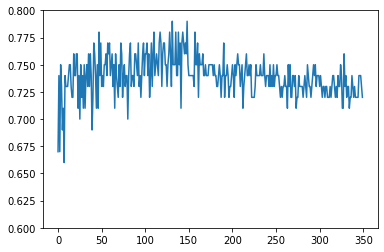

IMDBBINARY_sum_mlp1_batch32_dropout0.5_degtag.txt
Index of MaxValue: 57
MaxValue: 0.79
Mean (up till max epoch index): 0.733103448275862
Std (up till max epoch index): 0.02194146091761059


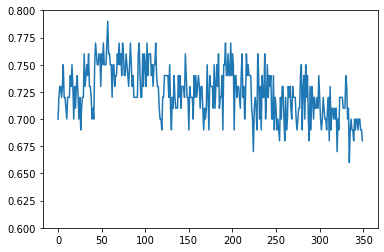

IMDBBINARY_sum_mlp1_batch128_dropout0_degtag.txt
Index of MaxValue: 2
MaxValue: 0.79
Mean (up till max epoch index): 0.7366666666666667
Std (up till max epoch index): 0.06110100926607786


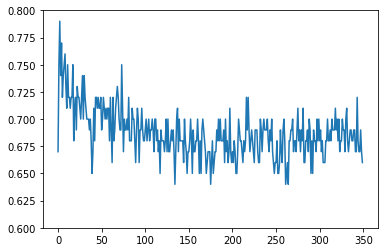

IMDBBINARY_sum_mlp1_batch128_dropout0.5_degtag.txt
Index of MaxValue: 15
MaxValue: 0.77
Mean (up till max epoch index): 0.7375
Std (up till max epoch index): 0.019148542155126777


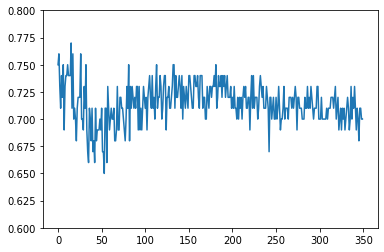

IMDBBINARY_sum_mlp2_batch32_dropout0_degtag.txt
Index of MaxValue: 18
MaxValue: 0.79
Mean (up till max epoch index): 0.7173684210526315
Std (up till max epoch index): 0.041745539384220834


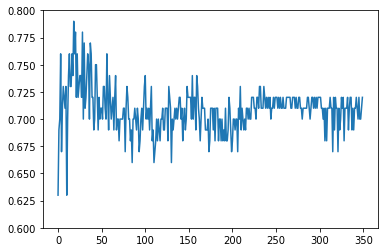

IMDBBINARY_sum_mlp2_batch32_dropout0.5_degtag.txt
Index of MaxValue: 18
MaxValue: 0.79
Mean (up till max epoch index): 0.731578947368421
Std (up till max epoch index): 0.0316689749851205


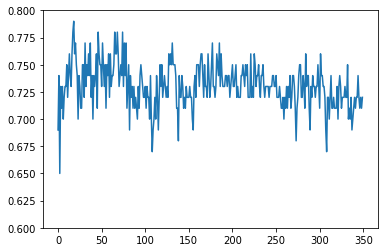

IMDBBINARY_sum_mlp2_batch128_dropout0_degtag.txt
Index of MaxValue: 8
MaxValue: 0.78
Mean (up till max epoch index): 0.7522222222222222
Std (up till max epoch index): 0.017159383568311683


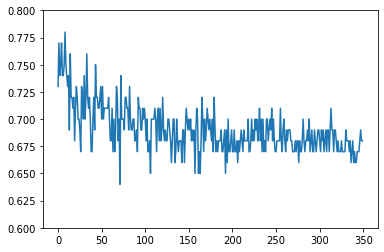

IMDBBINARY_sum_mlp2_batch128_dropout0.5_degtag.txt
Index of MaxValue: 2
MaxValue: 0.78
Mean (up till max epoch index): 0.73
Std (up till max epoch index): 0.04582575694955844


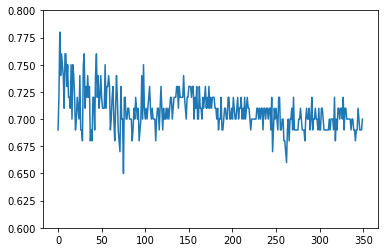

IMDBBINARY_average_mlp1_batch32_dropout0_degtag.txt
Index of MaxValue: 1
MaxValue: 0.8
Mean (up till max epoch index): 0.73
Std (up till max epoch index): 0.09899494936611666


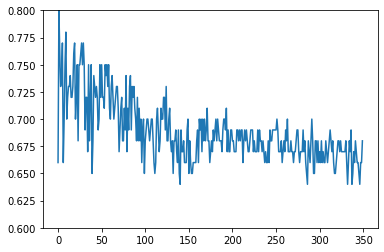

IMDBBINARY_average_mlp1_batch32_dropout0.5_degtag.txt
Index of MaxValue: 3
MaxValue: 0.8
Mean (up till max epoch index): 0.7250000000000001
Std (up till max epoch index): 0.06557438524302


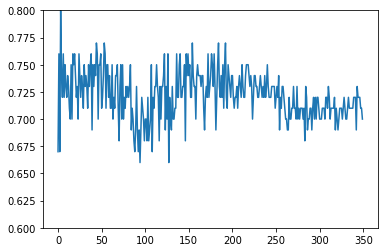

IMDBBINARY_average_mlp1_batch128_dropout0_degtag.txt
Index of MaxValue: 1
MaxValue: 0.79
Mean (up till max epoch index): 0.745
Std (up till max epoch index): 0.06363961030678934


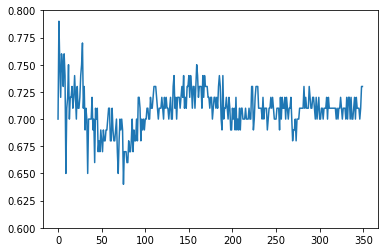

IMDBBINARY_average_mlp1_batch128_dropout0.5_degtag.txt
Index of MaxValue: 2
MaxValue: 0.78
Mean (up till max epoch index): 0.7633333333333333
Std (up till max epoch index): 0.01527525231651948


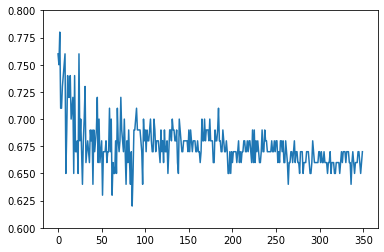

IMDBBINARY_average_mlp2_batch32_dropout0_degtag.txt
Index of MaxValue: 22
MaxValue: 0.79
Mean (up till max epoch index): 0.7230434782608697
Std (up till max epoch index): 0.038071079766989875


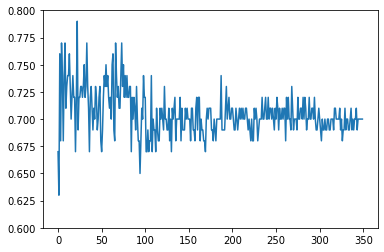

IMDBBINARY_average_mlp2_batch32_dropout0.5_degtag.txt
Index of MaxValue: 66
MaxValue: 0.8
Mean (up till max epoch index): 0.7425373134328357
Std (up till max epoch index): 0.02524685900548217


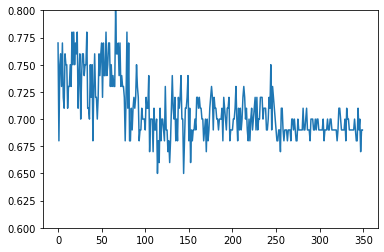

IMDBBINARY_average_mlp2_batch128_dropout0_degtag.txt
Index of MaxValue: 3
MaxValue: 0.79
Mean (up till max epoch index): 0.7275
Std (up till max epoch index): 0.05852349955359813


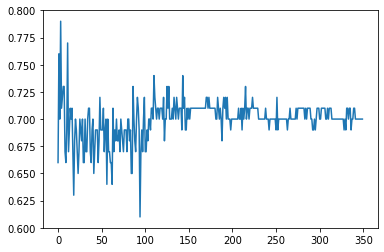

IMDBBINARY_average_mlp2_batch128_dropout0.5_degtag.txt
Index of MaxValue: 2
MaxValue: 0.8
Mean (up till max epoch index): 0.7733333333333334
Std (up till max epoch index): 0.03055050463303896


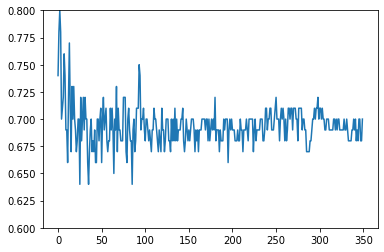

IMDBBINARY_max_mlp1_batch32_dropout0_degtag.txt
Index of MaxValue: 1
MaxValue: 0.76
Mean (up till max epoch index): 0.74
Std (up till max epoch index): 0.028284271247461926


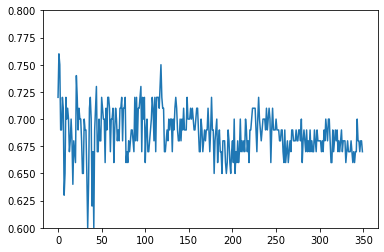

IMDBBINARY_max_mlp1_batch32_dropout0.5_degtag.txt
Index of MaxValue: 44
MaxValue: 0.79
Mean (up till max epoch index): 0.7184444444444444
Std (up till max epoch index): 0.02860034611643359


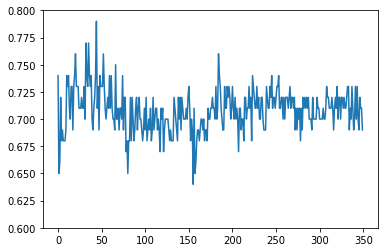

IMDBBINARY_max_mlp1_batch128_dropout0_degtag.txt
Index of MaxValue: 24
MaxValue: 0.75
Mean (up till max epoch index): 0.7028
Std (up till max epoch index): 0.023187640385918227


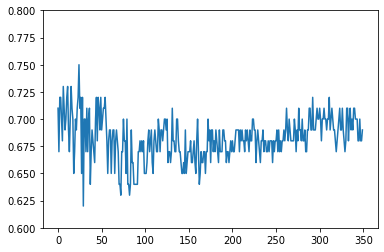

IMDBBINARY_max_mlp1_batch128_dropout0.5_degtag.txt
Index of MaxValue: 90
MaxValue: 0.78
Mean (up till max epoch index): 0.7210989010989012
Std (up till max epoch index): 0.02562336388058322


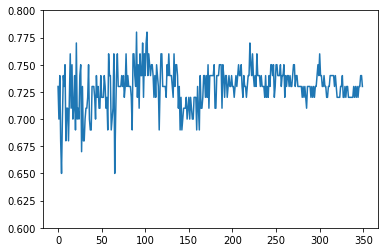

IMDBBINARY_max_mlp2_batch32_dropout0_degtag.txt
Index of MaxValue: 37
MaxValue: 0.77
Mean (up till max epoch index): 0.6947368421052631
Std (up till max epoch index): 0.025966385974351327


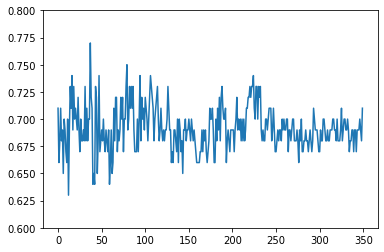

IMDBBINARY_max_mlp2_batch32_dropout0.5_degtag.txt
Index of MaxValue: 29
MaxValue: 0.76
Mean (up till max epoch index): 0.7076666666666667
Std (up till max epoch index): 0.02373464415855719


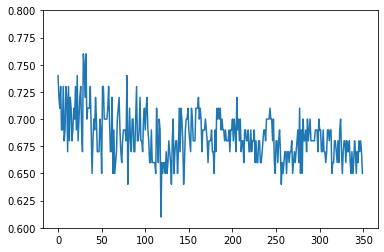

In [52]:
for filename in filenames:
    #filename = 'IMDBBINARY_sum_mlp1_batch32_dropout0_degtag.txt'
    file = open(filename, 'r') 
    lines = file.readlines()

    data = []

    for line in lines:
        epoch_data = line.replace("\n","").split(", ")
        data.append(epoch_data)
        #print(str(epoch_data))

    df = pd.DataFrame(data, columns =['avg_loss', 'acc_train', 'acc_test'], dtype = float)
    print(filename)
    #Max accuracy
    max_index = df['acc_test'].idxmax(axis = 0)
    print('Index of MaxValue: '+ str(max_index))
    print('MaxValue: '+str(df['acc_test'].max()))
    
    #Stats considering up till epoch with max accuracy
    print('Mean (up till max epoch index): '+ str(df['acc_test'].iloc[:max_index+1].mean()))
    print('Std (up till max epoch index): '+ str(df['acc_test'].iloc[:max_index+1].std()))
    
    plt.figure()
    df['acc_test'].plot(ylim=(0.6,0.8))
    plt.show()